In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

opioid_file = "Opioid Raw Data.csv"
op_data = pd.read_csv(opioid_file)

In [21]:
op_data.head()

,State,Year,Opioid Overdose Death Rate (Age-Adjusted),Percent Change in Opioid Overdose Death Rate from Prior Year
0,United States,2012.0,7.4,1.4
1,Alabama,2012.0,3.6,-5.3
2,Alaska,2012.0,10.8,24.1
3,Arizona,2012.0,8.2,-6.8
4,Arkansas,2012.0,6.0,-3.2


In [22]:
op_df = op_data.dropna(how="any")

In [23]:
op_df_rn = op_df.rename(columns={"Opioid Overdose Death Rate (Age-Adjusted)":"Opioid OD Death Rate", "Percent Change in Opioid Overdose Death Rate from Prior Year":"% Change in Opioid OD Death Rate from Prior Year"})

In [24]:
op_df_rn['Opioid OD Death Rate'] = pd.to_numeric(op_df_rn['Opioid OD Death Rate'])

In [25]:
op_df_rn['% Change in Opioid OD Death Rate from Prior Year'] = pd.to_numeric(op_df_rn['% Change in Opioid OD Death Rate from Prior Year'])

In [26]:
op_df_rn['Year'] = op_df_rn['Year'].astype(int)

In [27]:
op_df_rn.head()

,State,Year,Opioid OD Death Rate,% Change in Opioid OD Death Rate from Prior Year
0,United States,2012,7.4,1.4
1,Alabama,2012,3.6,-5.3
2,Alaska,2012,10.8,24.1
3,Arizona,2012,8.2,-6.8
4,Arkansas,2012,6.0,-3.2


In [30]:
OP_states_list=op_df_rn["State"].unique().tolist()
OP_state_dfs={state:op_df_rn.loc[(op_df["State"] == state),:] for state in OP_states_list}
OP_state_dfs["Colorado"]

,State,Year,Opioid OD Death Rate,% Change in Opioid OD Death Rate from Prior Year
6,Colorado,2012,7.7,-3.8
58,Colorado,2013,8.0,4.0
110,Colorado,2014,9.4,18.0
162,Colorado,2015,8.7,-7.4
214,Colorado,2016,9.5,9.0


In [37]:
OP_state_dfs["Ohio"]

,State,Year,Opioid OD Death Rate,% Change in Opioid OD Death Rate from Prior Year
36,Ohio,2012,12.3,9.8
88,Ohio,2013,14.6,19.0
140,Ohio,2014,19.1,31.0
192,Ohio,2015,24.7,29.3
244,Ohio,2016,32.9,33.0


In [31]:
OP_x_axis=op_df["Year"].unique().astype(int).tolist()
OP_x_axis

[2012, 2013, 2014, 2015, 2016]

In [32]:
OP_no_mj_states=["Idaho","Wyoming","South Dakota","Nebraska", "Texas", "Kansas", "Iowa","Wisconsin","Indiana","Kentucky","Tennessee","Virginia","North Carolina","South Carolina","Georgia", "Alabama","Mississippi"]
OP_no_mj_states_df=op_df_rn.loc[(op_df["State"].isin(OP_no_mj_states)),:]
OP_no_mj_states_df.head()

,State,Year,Opioid OD Death Rate,% Change in Opioid OD Death Rate from Prior Year
1,Alabama,2012,3.6,-5.3
11,Georgia,2012,5.4,0.0
13,Idaho,2012,3.9,-23.5
15,Indiana,2012,5.9,5.4
16,Iowa,2012,5.9,0.0


In [33]:
OP_no_mj_states_groupby_year=OP_no_mj_states_df.groupby("Year")
OP_no_mj_avg_op=OP_no_mj_states_groupby_year.mean()
print("Yearly Averages of States without Legalized Recreational Use of Marijuana*")
print("(*Idaho, Wyoming, South Dakota, Nebraska, Texas, Kansas, Iowa, Wisconsin, Indiana, Kentucky, Tennessee, Virginia, North Carolina, South Carolina, Georgia, Alabama, Mississippi)")
OP_no_mj_avg_op

Yearly Averages of States without Legalized Recreational Use of Marijuana*
(*Idaho, Wyoming, South Dakota, Nebraska, Texas, Kansas, Iowa, Wisconsin, Indiana, Kentucky, Tennessee, Virginia, North Carolina, South Carolina, Georgia, Alabama, Mississippi)


,Opioid OD Death Rate,% Change in Opioid OD Death Rate from Prior Year
Year,,
2012,6.400000,2.017647
2013,6.670588,5.294118
2014,7.770588,20.235294
2015,8.594118,10.994118
2016,10.252941,17.470588


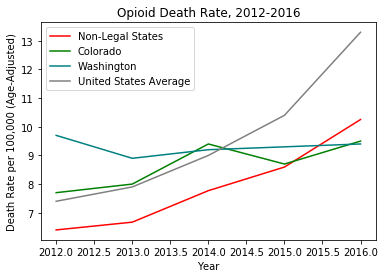

In [34]:
OP_no_mj_op,= plt.plot(OP_x_axis, OP_no_mj_avg_op["Opioid OD Death Rate"], label="Non-Legal States", color="red")
OP_colorado_op,= plt.plot(OP_x_axis, OP_state_dfs["Colorado"]["Opioid OD Death Rate"], label="Colorado", color="green")
OP_washington_op,= plt.plot(OP_x_axis, OP_state_dfs["Washington"]["Opioid OD Death Rate"], label="Washington", color="teal")
OP_united_states_op,= plt.plot(OP_x_axis, OP_state_dfs["United States"]["Opioid OD Death Rate"], label="United States Average", color="grey")

plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Death Rate per 100,000 (Age-Adjusted)')
plt.title('Opioid Death Rate, 2012-2016')
plt.savefig("Opioid_Death_Rate.png")
plt.show()

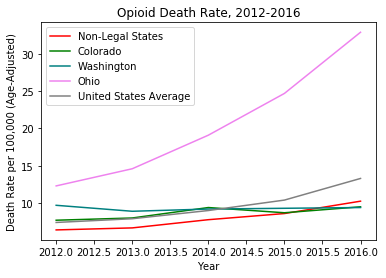

In [38]:
OP_no_mj_op2,= plt.plot(OP_x_axis, OP_no_mj_avg_op["Opioid OD Death Rate"], label="Non-Legal States", color="red")
OP_colorado_op2,= plt.plot(OP_x_axis, OP_state_dfs["Colorado"]["Opioid OD Death Rate"], label="Colorado", color="green")
OP_washington_op2,= plt.plot(OP_x_axis, OP_state_dfs["Washington"]["Opioid OD Death Rate"], label="Washington", color="teal")
OP_ohio_op2,= plt.plot(OP_x_axis, OP_state_dfs["Ohio"]["Opioid OD Death Rate"], label="Ohio", color="violet")
OP_united_states_op2,= plt.plot(OP_x_axis, OP_state_dfs["United States"]["Opioid OD Death Rate"], label="United States Average", color="grey")

plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('Death Rate per 100,000 (Age-Adjusted)')
plt.title('Opioid Death Rate, 2012-2016')
plt.savefig("Opioid_Death_Rate_Ohio_added.png")
plt.show()

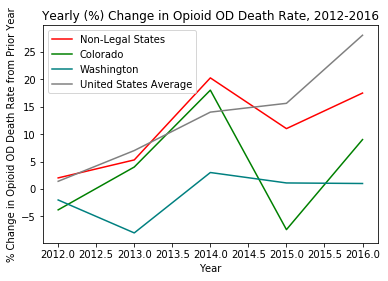

In [36]:
OP_no_mj_pp,= plt.plot(OP_x_axis, OP_no_mj_avg_op["% Change in Opioid OD Death Rate from Prior Year"], label="Non-Legal States", color="red")
OP_colorado_pp,= plt.plot(OP_x_axis, OP_state_dfs["Colorado"]["% Change in Opioid OD Death Rate from Prior Year"], label="Colorado", color="green")
OP_washington_pp,= plt.plot(OP_x_axis, OP_state_dfs["Washington"]["% Change in Opioid OD Death Rate from Prior Year"], label="Washington", color="teal")
OP_united_states_pp,= plt.plot(OP_x_axis, OP_state_dfs["United States"]["% Change in Opioid OD Death Rate from Prior Year"], label="United States Average", color="grey")

plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('% Change in Opioid OD Death Rate from Prior Year')
plt.title('Yearly (%) Change in Opioid OD Death Rate, 2012-2016')
plt.savefig("Yearly_Change_in_Opioid_OD_Death_Rate.png")
plt.show()

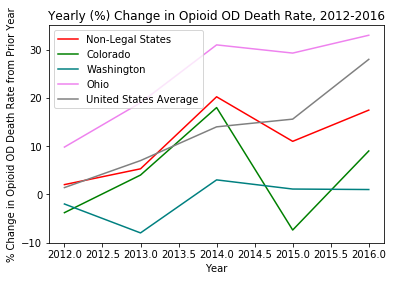

In [39]:
OP_no_mj_pp2,= plt.plot(OP_x_axis, OP_no_mj_avg_op["% Change in Opioid OD Death Rate from Prior Year"], label="Non-Legal States", color="red")
OP_colorado_pp2,= plt.plot(OP_x_axis, OP_state_dfs["Colorado"]["% Change in Opioid OD Death Rate from Prior Year"], label="Colorado", color="green")
OP_washington_pp2,= plt.plot(OP_x_axis, OP_state_dfs["Washington"]["% Change in Opioid OD Death Rate from Prior Year"], label="Washington", color="teal")
OP_ohio_pp2,= plt.plot(OP_x_axis, OP_state_dfs["Ohio"]["% Change in Opioid OD Death Rate from Prior Year"], label="Ohio", color="violet")
OP_united_states_pp2,= plt.plot(OP_x_axis, OP_state_dfs["United States"]["% Change in Opioid OD Death Rate from Prior Year"], label="United States Average", color="grey")

plt.legend(loc="best")
plt.xlabel('Year')
plt.ylabel('% Change in Opioid OD Death Rate from Prior Year')
plt.title('Yearly (%) Change in Opioid OD Death Rate, 2012-2016')
plt.savefig("Yearly_Change_in_Opioid_OD_Death_Rate_2.png")
plt.show()